In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_kiva_opportunity_map(PHL, PHL_loans, name_column='Name', save_path=None):
    """
    Plots Kiva loan coverage and high-opportunity islands in the Philippines.

    Parameters:
    -----------
    PHL : GeoDataFrame
        Polygon data for Philippine islands.
    PHL_loans : GeoDataFrame
        Point data for Kiva loan locations in the Philippines.
    name_column : str
        Column name in `PHL` to label islands (default: 'Name').
    save_path : str or None
        If provided, saves the map to this file path (e.g., 'map.png').
    """

    # Ensure CRS matches
    if PHL_loans.crs != PHL.crs:
        PHL_loans = PHL_loans.set_crs(PHL.crs, allow_override=True)

    # Spatial join to find covered islands
    joined = gpd.sjoin(PHL, PHL_loans, how='left', predicate='contains')
    PHL['opportunity'] = ~PHL.index.isin(joined.dropna(subset=['index_right']).index)

    # Separate GeoDataFrames
    opportunity_islands = PHL[PHL['opportunity']]
    covered_islands = PHL[~PHL['opportunity']]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 10))
    PHL.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

    if not opportunity_islands.empty:
        opportunity_islands.plot(ax=ax, color='gold', edgecolor='red', linewidth=2, label='High Opportunity')
        for idx, row in opportunity_islands.iterrows():
            if not row.geometry.is_empty and row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                x, y = row.geometry.centroid.coords[0]
                label = str(row.get(name_column, f"ID {idx}"))
                ax.text(x, y, label, fontsize=8, color='darkred', ha='center')

    if not covered_islands.empty:
        covered_islands.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, label='Existing Kiva Loans')

    # Auto-zoom to opportunity islands
    if not opportunity_islands.empty:
        minx, miny, maxx, maxy = opportunity_islands.total_bounds
        ax.set_xlim(minx - 0.5, maxx + 0.5)
        ax.set_ylim(miny - 0.5, maxy + 0.5)

    ax.legend()
    ax.set_title("Kiva Loan Opportunities by Island in the Philippines", fontsize=14)
    plt.tight_layout()

    # Optional save to file
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"✅ Map saved to: {save_path}")
    else:
        plt.show()


C:\Users\Mehrima\AppData\Local\Temp\ipykernel_9132\3023146440.py:53: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\Mehrima\AppData\Local\Temp\ipykernel_9132\3023146440.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


✅ Map saved to: kiva_opportunity_map.png


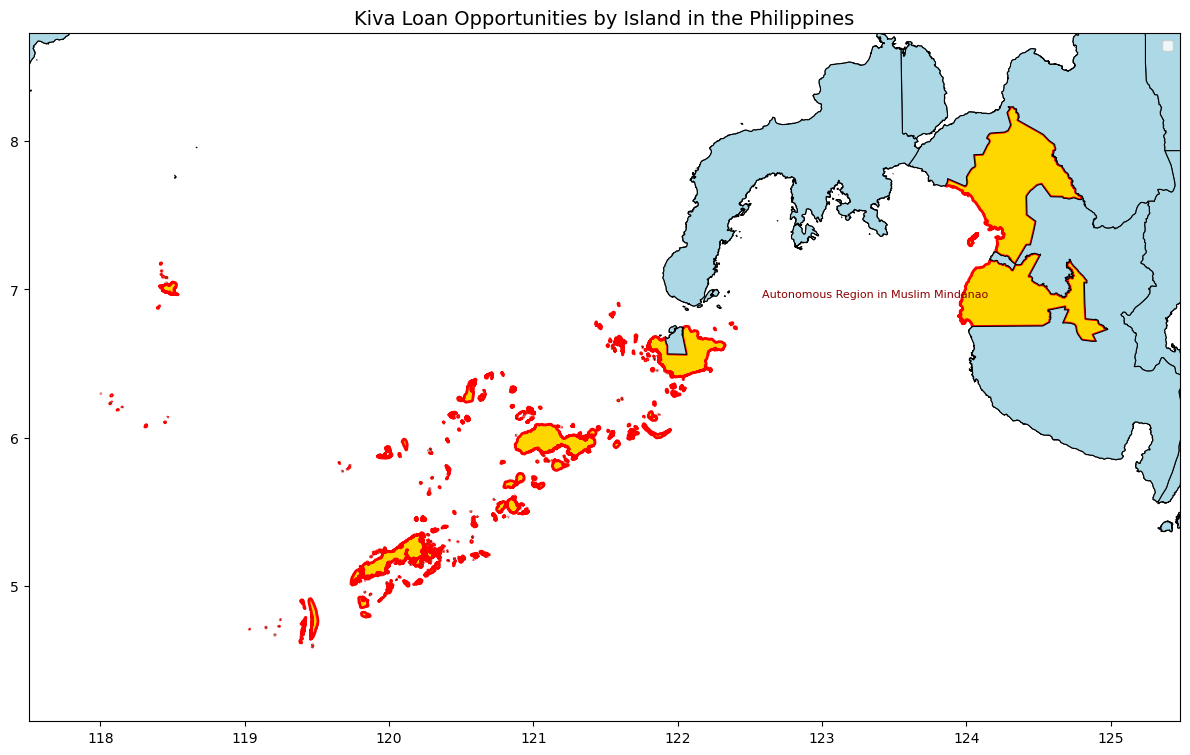

In [8]:
# Load your GeoDataFrames (assuming you already have these)
PHL = gpd.read_file("../geodata/geospatial_db/Philippines_AL258.kml", driver='KML')
PHL_loans = gpd.read_file("../geodata/geospatial_db/kiva_loans/kiva_loans")

# Plot and save map
plot_kiva_opportunity_map(PHL, PHL_loans, name_column='Name', save_path='kiva_opportunity_map.png')
